<a href="https://colab.research.google.com/github/himanshu3103/PyTorch/blob/main/08_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Classification
## Resources : 
  * [Sklearn Breast Cancer Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
  * [Sklearn Bunch (Dictionary)](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)
  * [Sklearn Train Test Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
  * [Sklearn Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  * [Binary Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#bceloss)
  * [Adam Optimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#adam)

##Loading and Prepocessing the data

In [1]:
#Importing all the required libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [65]:
#Loading the dataset Sklearn
from sklearn.datasets import load_breast_cancer 

In [66]:
data = load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

In [27]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
#Target data shape
data['target'].shape

(569,)

In [29]:
#Input data shape
data['data'].shape

(569, 30)

In [30]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [31]:
data['feature_names'], data['feature_names'].shape

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 (30,))

### Splitting the data into train and test 

In [32]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

In [69]:
N,D = X_train.shape

Text(0, 0.5, 'mean texture')

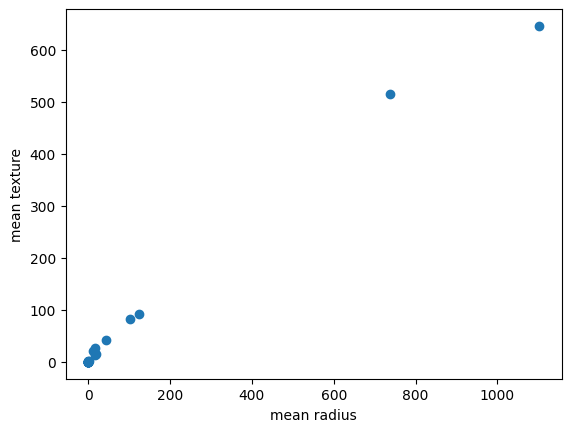

In [36]:
plt.scatter(X_train[0],X_train[1])
plt.xlabel("mean radius")
plt.ylabel("mean texture")

### Normalizing the data

In [37]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'mean texture')

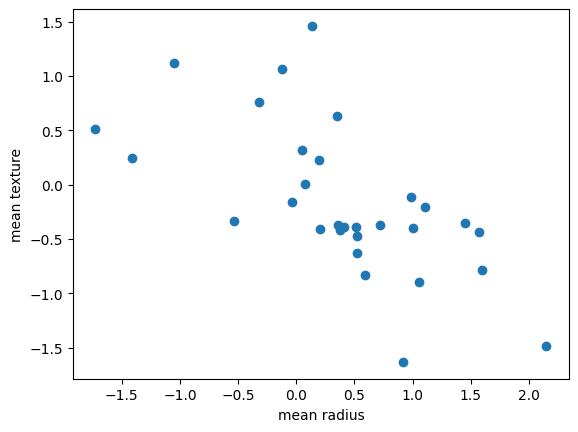

In [39]:
plt.scatter(X_train[0],X_train[1])
plt.xlabel("mean radius")
plt.ylabel("mean texture")

### Creating Model

In [71]:
model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [72]:
#Loss - BCE
loss_fn = nn.BCELoss()
#Optimizer - Adam
optimizer = torch.optim.Adam(params=model.parameters())

In [73]:
X_inputs = torch.from_numpy(X_train.astype(np.float32))
X_inputs_test = torch.from_numpy(X_test.astype(np.float32))
y_targets = torch.from_numpy(y_train.astype(np.float32))
y_targets_test = torch.from_numpy(y_test.astype(np.float32))

In [74]:
y_targets = y_targets.reshape(-1,1)
y_targets_test = y_targets_test.reshape(-1,1)
y_targets_test.shape

torch.Size([188, 1])

In [75]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0010,  0.1111, -0.1759, -0.0043, -0.1544,  0.1116,  0.0043,  0.0167,
                        0.1093,  0.1453, -0.1680,  0.1248, -0.0569, -0.0715, -0.0808,  0.0726,
                       -0.1763, -0.0064, -0.1374,  0.0205,  0.0996,  0.0434, -0.1771, -0.0400,
                        0.0692,  0.0772, -0.1140, -0.0590, -0.0588,  0.0764]])),
             ('0.bias', tensor([0.1801]))])

### Training Model

In [77]:
epochs = 1500
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
  ## training mode
  model.train()
  #1.
  optimizer.zero_grad()
  #2.
  y_pred = model(X_inputs)
  #3.
  loss = loss_fn(y_pred,y_targets)
  train_losses.append(loss.item())
  #4. 
  loss.backward()
  optimizer.step()

  ##Testing mode
  model.eval()
  #1.
  y_pred_test = model(X_inputs_test)
  #2.
  loss_test = loss_fn(y_pred_test,y_targets_test)
  test_losses.append(loss_test.item())
  
  ## Storing test and training accuracy
  y_pred_train = np.round(y_pred.detach().numpy())
  y_pred_test = np.round(y_pred_test.detach().numpy())
  acc_train = np.mean(y_pred_train==y_targets.detach().numpy())
  acc_test = np.mean(y_pred_test==y_targets_test.detach().numpy())
  train_accuracy.append(acc_train)
  test_accuracy.append(acc_test)

  if epoch%50==0:
    print(f"Epoch {epoch+1}/{epochs} | Train Loss : {loss} | Test Loss : {loss_test} | Train Acc : {(acc_train*100):.4f} | Test Acc : {(acc_test*100):.4f}")

Epoch 1/1500 | Train Loss : 0.5622485876083374 | Test Loss : 0.563847005367279 | Train Acc : 82.1522 | Test Acc : 76.5957
Epoch 51/1500 | Train Loss : 0.37078657746315 | Test Loss : 0.37230852246284485 | Train Acc : 91.8635 | Test Acc : 90.9574
Epoch 101/1500 | Train Loss : 0.2828517556190491 | Test Loss : 0.2851070761680603 | Train Acc : 93.4383 | Test Acc : 94.6809
Epoch 151/1500 | Train Loss : 0.23360246419906616 | Test Loss : 0.23545199632644653 | Train Acc : 94.4882 | Test Acc : 95.2128
Epoch 201/1500 | Train Loss : 0.20188409090042114 | Test Loss : 0.20281769335269928 | Train Acc : 95.8005 | Test Acc : 95.7447
Epoch 251/1500 | Train Loss : 0.17977577447891235 | Test Loss : 0.17961710691452026 | Train Acc : 95.8005 | Test Acc : 96.8085
Epoch 301/1500 | Train Loss : 0.16356168687343597 | Test Loss : 0.16230864822864532 | Train Acc : 96.5879 | Test Acc : 96.8085
Epoch 351/1500 | Train Loss : 0.151187464594841 | Test Loss : 0.14891478419303894 | Train Acc : 96.8504 | Test Acc : 96.80

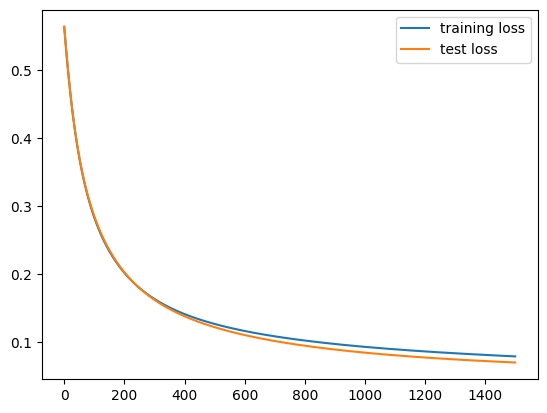

In [78]:
plt.plot(train_losses,label="training loss")
plt.plot(test_losses,label="test loss")
plt.legend()
plt.show()

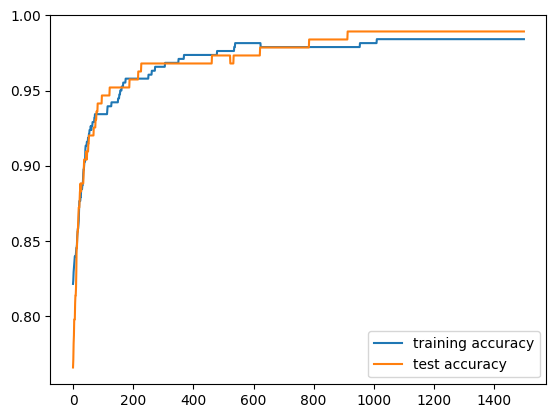

In [79]:
plt.plot(train_accuracy,label="training accuracy")
plt.plot(test_accuracy,label="test accuracy")
plt.legend()
plt.show()

### Calculating the accuracy

In [80]:
with torch.inference_mode():
  #Training accuracy
  pred_train = model(X_inputs).numpy()
  pred_train = np.round(pred_train)
  train_acc = np.mean(y_targets.numpy()==pred_train)
  #Test accuracy
  pred_test = model(X_inputs_test).numpy()
  pred_test = np.round(pred_test)
  test_acc = np.mean(y_targets_test.numpy()==pred_test)
print(f"Train accuracy: {train_acc:.4f} | Test accuracy: {test_acc:.4f}")

Train accuracy: 0.9843 | Test accuracy: 0.9894


## Saving and Loading Model

In [81]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3628, -0.4645, -0.5342, -0.3799, -0.3948, -0.0571, -0.4246, -0.4181,
                       -0.0831,  0.7231, -0.6682, -0.0568, -0.4774, -0.5287, -0.1540,  0.2934,
                       -0.1580, -0.2625,  0.3832,  0.7114, -0.3252, -0.5812, -0.5802, -0.4622,
                       -0.3952, -0.2403, -0.5701, -0.4875, -0.6546, -0.3120]])),
             ('0.bias', tensor([0.5464]))])

In [82]:
#Saving the model
torch.save(model.state_dict(),
           'mymodel.pth')

In [83]:
!ls

mymodel.pth  sample_data


In [84]:
#Loading the model
model_new = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)
model_new.load_state_dict(torch.load('mymodel.pth'))

<All keys matched successfully>

In [86]:
#Evalutaing the loaded model
with torch.inference_mode():
  prediction_train = np.round(model_new(X_inputs).numpy())
  train_accr = np.mean(y_targets.numpy()==prediction_train)
  prediction_test = np.round(model_new(X_inputs_test).numpy())
  test_accr = np.mean(y_targets_test.numpy()==prediction_test)
print(f"Train accuracy: {train_accr:.4f} | Test accuracy: {test_accr:.4f}")

Train accuracy: 0.9843 | Test accuracy: 0.9894


In [87]:
#Download the model
from google.colab import files
files.download('mymodel.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>